# Capstone Project - The Battle of the Neighborhoods (Week 2)
Applied Data Science Capstone by IBM/Coursera

# Table of contents
Introduction: Business Problem
Data
Methodology
Analysis
Results and Discussion
Conclusion

# Introduction: Business Problem Section

Here we are at the final test of this long course. I should have acquired all the skills and tools to use location data to explore a geographic location. I now have the opportunity to be as creative as I wish and to see how to take advantage of Foursquare's Location Data to explore or compare the neighborhoods or cities of my choice and to find a problem that I can use to solve Foursquare's location data. I have to clearly define the problem of my choice, where I have to take advantage of Foursquare's location data to solve. I have to remember that data science problems always target an audience and are meant to help a group of stakeholders solve a problem, so I have to explicitly describe my target audience and why they care about the problem. The purpose of this project is to find a safe place for restaurants to open in San Francisco, United States. In particular, this work is aimed at anyone who wants to open a restaurant in San Francisco, in the United States. First I have to choose the safest neighborhood by analyzing the crime data for the opening of the restaurant and a list of a neighborhood, where the restaurants are located as close as possible to the city of San Francisco, but in any case in unusual places. I will use data science tools to analyze the data and focus on the safest district and explore its neighborhoods and the ten most common locations in each neighborhood so that I can select the best neighborhood where the bar is not among the most common places.

# Data Section

Here I describe the data that I will use to solve the problem. I must remember that I will have to use Foursquare's location data to solve the problem. I can also use other datasets in combination with Foursquare location data. So I have to make sure that I provide adequate explanations and discussions, with examples, of the data I will use, even if it is only data on Foursquare's position. I will upload the document to the github repository by attaching the link here, as this section will be part of the final document of the project.

Based on the definition of our problem, the factors that will influence our decision are:

find the safest district based on crime statistics find the most common places choosing the right neighborhood within the neighborhood I will use the geographic coordinates of San Francisco to trace neighborhoods in a safe neighborhood and close to the city, and finally to group our neighborhoods and present our results.

To extract / generate the requested information the following data sources will be needed:

Part 1: Using a Kaggle real world data set containing San Francisco crimes from 2003 to 2019: a data set consisting of the crime statistics of each San Francisco neighborhood along with the crime type, year, month and now register.

Part 2: Collection of additional information on the list of districts officially classified in San Francisco from Wikipedia: information on the districts will be used to map the existing data in which each district can be assigned to the right district.

Part 3: Creation of a new consolidated neighborhood dataset, together with their districts, crime data and respective neighborhood coordinates.: This data will be retrieved using OpenCage Geocoder to find the safest district and explore the neighborhood on maps using Folium and perform exploratory data analysis.

Part 4: creation of a new consolidated dataset of the most common neighborhoods, districts and locations and of the respective neighborhood together with coordinates: this data will be recovered using the FourSquare API to explore the neighborhood's locations and apply a machine-learning algorithm to group neighborhoods and present results by plotting them on maps using Folium.

###Part 1: Using a real world data set from Kaggle containing the San Francisco Crimes from 2007 to 2015

San Francisco Crime Report
Properties of the Crime Report formatted later as needed

TYPE - Crime type
YEAR - Recorded year
MONTH - Recorded month
DAY - Recorded day
HOUR - Recorded hour
MINUTE - Recorded minute
HUNDRED_BLOCK - Recorded block
NEIGHBOURHOOD - Recorded neighborhood
X - GPS longtitude
Y - GPS latitude

Data set URL: https://www.kaggle.com/kaggle/san-francisco-crime-classification?select=train.csv

In [1]:
import csv
import pandas as pd

In [2]:
import os

In [3]:
os.getcwd()

'/home/ben/Desktop/IBM_project/IBM_Capstone'

In [4]:
df = pd.read_csv("train.csv") 

In [5]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [6]:
df.size

7902441

In [7]:
df.shape

(878049, 9)

In [8]:
grouped = df.groupby('Category').count()

In [9]:
grouped.sort_values('Y', ascending=False)

,Dates,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
Category,,,,,,,,
LARCENY/THEFT,174900,174900,174900,174900,174900,174900,174900,174900
OTHER OFFENSES,126182,126182,126182,126182,126182,126182,126182,126182
NON-CRIMINAL,92304,92304,92304,92304,92304,92304,92304,92304
ASSAULT,76876,76876,76876,76876,76876,76876,76876,76876
DRUG/NARCOTIC,53971,53971,53971,53971,53971,53971,53971,53971
VEHICLE THEFT,53781,53781,53781,53781,53781,53781,53781,53781
VANDALISM,44725,44725,44725,44725,44725,44725,44725,44725
WARRANTS,42214,42214,42214,42214,42214,42214,42214,42214
BURGLARY,36755,36755,36755,36755,36755,36755,36755,36755


In [10]:
grouped.to_csv ('SanFransciscoCrimeGrouped.csv', index = False, header=True)

In [11]:
grouped.shape

(39, 8)

In [12]:
df2 = df[df.Category != 'LARCENY/THEFT']

In [13]:
df2 = df2[df2.Category != 'OTHER OFFENSES']

In [14]:
df2 = df2[df2.Category != 'NON-CRIMINAL']

In [15]:
df2 = df2[df2.Category != 'ASSAULT']

In [16]:
df2 = df2[df2.Category != 'DRUG/NARCOTIC']

In [17]:
df2 = df2[df2.Category != 'VEHICLE THEFT']

In [18]:
df2 = df2[df2.Category != 'VANDALISM']

In [19]:
df2 = df2[df2.Category != 'WARRANTS']

In [20]:
df2 = df2[df2.Category != 'BURGLARY']

In [21]:
df2 = df2[df2.Category != 'SUSPICIOUS OCC']

In [22]:
df2.size

1304343

In [23]:
df2.shape

(144927, 9)

In [24]:
df2.to_csv ('SanFransciscoCrimeSubDataSet.csv', index = False, header=True)

In [25]:
df2.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')

In [26]:
grouped2 = df.groupby('Resolution').count()

In [27]:
grouped2.sort_values('Y', ascending=False)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Address,X,Y
Resolution,,,,,,,,
NONE,526790,526790,526790,526790,526790,526790,526790,526790
"ARREST, BOOKED",206403,206403,206403,206403,206403,206403,206403,206403
"ARREST, CITED",77004,77004,77004,77004,77004,77004,77004,77004
LOCATED,17101,17101,17101,17101,17101,17101,17101,17101
PSYCHOPATHIC CASE,14534,14534,14534,14534,14534,14534,14534,14534
UNFOUNDED,9585,9585,9585,9585,9585,9585,9585,9585
JUVENILE BOOKED,5564,5564,5564,5564,5564,5564,5564,5564
COMPLAINANT REFUSES TO PROSECUTE,3976,3976,3976,3976,3976,3976,3976,3976
DISTRICT ATTORNEY REFUSES TO PROSECUTE,3934,3934,3934,3934,3934,3934,3934,3934


In [28]:
df3 = df[df.Category != 'NON-CRIMINAL']

In [29]:
df.shape

(878049, 9)

In [30]:
df3.shape

(785745, 9)

In [31]:
df4 = df3[df3.Resolution != 'NONE']

In [32]:
df4.shape

(327477, 9)

In [33]:
df4

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
18,2015-05-13 21:40:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,BAYVIEW,"ARREST, BOOKED",MENDELL ST / HUDSON AV,-122.386401,37.738983
43,2015-05-13 20:06:00,OTHER OFFENSES,PROBATION VIOLATION,Wednesday,BAYVIEW,"ARREST, BOOKED",300 Block of WILLIAMS AV,-122.399444,37.730176
...,...,...,...,...,...,...,...,...,...
878038,2003-01-06 00:42:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Monday,TENDERLOIN,"ARREST, BOOKED",TAYLOR ST / GEARY ST,-122.411519,37.786941
878039,2003-01-06 00:40:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,NORTHERN,"ARREST, CITED",POLK ST / CALIFORNIA ST,-122.420692,37.790577
878041,2003-01-06 00:31:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,RICHMOND,"ARREST, CITED",CLEMENT ST / 14TH AV,-122.472985,37.782552
878042,2003-01-06 00:20:00,ASSAULT,ATTEMPTED HOMICIDE WITH A GUN,Monday,BAYVIEW,"ARREST, BOOKED",1500 Block of SHAFTER AV,-122.389769,37.730564


In [34]:
df4.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')

In [35]:
df5 = df3[df3.Resolution == 'NONE']

In [36]:
df5.size

4124412

In [37]:
df5.shape

(458268, 9)

In [38]:
# first let's convert Dates with a pandas datetime compatible
df.Dates = df.Dates.apply(pd.to_datetime)

In [39]:
df.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')

In [40]:
# now we can split the datetime into different columns
df['Day'] = df['Dates'].dt.day
df['Month'] = df['Dates'].dt.month
df['Year'] = df['Dates'].dt.year
df['Hour'] = df['Dates'].dt.hour

In [41]:
df.columns


Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'Day', 'Month', 'Year', 'Hour'],
      dtype='object')

In [42]:
df.head()


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Day,Month,Year,Hour
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,13,5,2015,23
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,13,5,2015,23
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,13,5,2015,23
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,13,5,2015,23
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,13,5,2015,23


In [43]:
df.columns = ['Dates', 'Type', 'Description', 'DayOfWeek', 'Neighbourhood', 'Resolution', 'Address', 'X', 'Y', 'Day', 'Month', 'Year', 'Hour']
df.head()

,Dates,Type,Description,DayOfWeek,Neighbourhood,Resolution,Address,X,Y,Day,Month,Year,Hour
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,13,5,2015,23
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,13,5,2015,23
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,13,5,2015,23
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,13,5,2015,23
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,13,5,2015,23


In [44]:
df.size

11414637

In [45]:
df.columns

Index(['Dates', 'Type', 'Description', 'DayOfWeek', 'Neighbourhood',
       'Resolution', 'Address', 'X', 'Y', 'Day', 'Month', 'Year', 'Hour'],
      dtype='object')

In [46]:
del df['Dates']

In [47]:
del df['DayOfWeek']

In [48]:
del df['Address']

In [49]:
del df['X']

In [50]:
del df['Y']

In [51]:
df.size

7024392

In [52]:
df.shape

(878049, 8)

In [53]:
del df['Resolution']

In [54]:
del df['Description']

# Methodology

Categorized the methodologysection into two parts:

Exploratory Data Analysis: Visualise the crime repots in different Vancouver boroughs to idenity the safest borough and normalise the neighborhoods of that borough. We will Use the resulting data and find 10 most common venues in each neighborhood.
Modelling: To help stakeholders choose the right neighborhood within a borough we will be clustering similar neighborhoods using K - means clustering which is a form of unsupervised machine learning algorithm that clusters data based on predefined cluster size. We will use K-Means clustering to address this problem so as to group data based on existing venues which will help in the decision making process.


# Data Analysis

In [55]:
df['Neighbourhood'].value_counts()

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: Neighbourhood, dtype: int64

In [56]:
#### Pivoting the table to better understand the data by crimes per borough
sfc_crime_cat = pd.pivot_table(df,
                               values=['Year'],
                               index=['Neighbourhood'],
                               columns=['Type'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)
sfc_crime_cat

Year                                                         \
Type          ARSON ASSAULT BAD CHECKS BRIBERY BURGLARY DISORDERLY CONDUCT   
Neighbourhood                                                                
BAYVIEW         393    9857         34      56     3930                219   
CENTRAL         111    6977         65      12     4519                494   
INGLESIDE       182    8533         32      53     3331                171   
MISSION         145   11149         46      66     3745               1099   
NORTHERN        149    8318         54      18     5854                452   
PARK             65    3515         15       7     2888                271   
RICHMOND        103    3202         31       8     2696                108   
SOUTHERN        185   12183         74      37     4841                511   
TARAVAL         120    5463         36      17     3463                162   
TENDERLOIN       60    7679         19      15     1488                833   
All            1513   76876        406     289    36755               4320   

                                                                     \
Type          DRIVING UNDER THE INFLUENCE DRUG/NARCOTIC DRUNKENNESS   
Neighbourhood                                                         
BAYVIEW                               179          4498         243   
CENTRAL                               160          1805         517   
INGLESIDE                             206          2373         190   
MISSION                               357          8757         782   
NORTHERN                              260          4511         368   
PARK                                  176          2573         374   
RICHMOND                              319           999         149   
SOUTHERN                              306          9228         959   
TARAVAL                               202          1531         259   
TENDERLOIN                            103         17696         439   
All                                  2268         53971        4280   

                            ...                                              \
Type          EMBEZZLEMENT  ... STOLEN PROPERTY SUICIDE SUSPICIOUS OCC TREA   
Neighbourhood               ...                                               
BAYVIEW                100  ...             397      37           3906    3   
CENTRAL                180  ...             510      60           2842    1   
INGLESIDE               78  ...             347      65           3167    0   
MISSION                124  ...             631      72           3808    1   
NORTHERN               131  ...             700      67           3270    1   
PARK                    50  ...             175      20           1656    0   
RICHMOND                43  ...             206      42           2191    0   
SOUTHERN               275  ...            1007      59           5065    0   
TARAVAL                 94  ...             231      59           2996    0   
TENDERLOIN              91  ...             336      27           2513    0   
All                   1166  ...            4540     508          31414    6   

                                                                             
Type          TRESPASS VANDALISM VEHICLE THEFT WARRANTS WEAPON LAWS     All  
Neighbourhood                                                                
BAYVIEW            636      5356          7219     4322        1647   89431  
CENTRAL            904      4469          4210     2777         487   85460  
INGLESIDE          416      5374          8960     2528        1130   78845  
MISSION           1021      5294          7148     6615        1329  119908  
NORTHERN           780      5404          6291     4599         789  105296  
PARK               290      2613          3963     2318         357   49313  
RICHMOND           245      3180          4117     1010         327   45209  
SOUTHERN          1456      6550        

In [57]:
####Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.
sfc_crime_cat.describe()

Year                                                      \
Type         ARSON       ASSAULT  BAD CHECKS     BRIBERY      BURGLARY   
count    11.000000     11.000000   11.000000   11.000000     11.000000   
mean    275.090909  13977.454545   73.818182   52.545455   6682.727273   
std     420.347821  21054.318096  111.647497   81.187885  10040.864804   
min      60.000000   3202.000000   15.000000    7.000000   1488.000000   
25%     107.000000   6220.000000   31.500000   13.500000   3109.500000   
50%     145.000000   8318.000000   36.000000   18.000000   3745.000000   
75%     183.500000  10503.000000   59.500000   54.500000   4680.000000   
max    1513.000000  76876.000000  406.000000  289.000000  36755.000000   

                                                                    \
Type  DISORDERLY CONDUCT DRIVING UNDER THE INFLUENCE DRUG/NARCOTIC   
count          11.000000                   11.000000     11.000000   
mean          785.454545                  412.363636   9812.909091   
std          1211.436120                  620.181792  15453.368005   
min           108.000000                  103.000000    999.000000   
25%           195.000000                  177.500000   2089.000000   
50%           452.000000                  206.000000   4498.000000   
75%           672.000000                  312.500000   8992.500000   
max          4320.000000                 2268.000000  53971.000000   

                                 ...                              \
Type   DRUNKENNESS EMBEZZLEMENT  ... STOLEN PROPERTY     SUICIDE   
count    11.000000    11.000000  ...       11.000000   11.000000   
mean    778.181818   212.000000  ...      825.454545   92.363636   
std    1187.775637   322.999071  ...     1256.826111  138.904480   
min     149.000000    43.000000  ...      175.000000   20.000000   
25%     251.000000    84.500000  ...      283.500000   39.500000   
50%     374.000000   100.000000  ...      397.000000   59.000000   
75%     649.500000   155.500000  ...      665.500000   66.000000   
max    4280.000000  1166.000000  ...     4540.000000  508.000000   

                                                                          \
Type  SUSPICIOUS OCC       TREA     TRESPASS     VANDALISM VEHICLE THEFT   
count      11.000000  11.000000    11.000000     11.000000     11.000000   
mean     5711.636364   1.090909  1332.000000   8131.818182   9778.363636   
std      8573.414644   1.868397  2025.668828  12222.372927  14748.297327   
min      1656.000000   0.000000   245.000000   1616.000000   1006.000000   
25%      2677.500000   0.000000   401.000000   3824.500000   4163.500000   
50%      3167.000000   0.000000   780.000000   5294.000000   6142.000000   
75%      3857.000000   1.000000  1106.500000   5389.000000   7183.500000   
max     31414.000000   6.000000  7326.000000  44725.000000  53781.000000   

                                                 
Type       WARRANTS  WEAPON LAWS            All  
count     11.000000    11.000000      11.000000  
mean    7675.272727  1555.454545  159645.272727  
std    11735.542962  2358.989714  240370.065148  
min     1010.000000   327.000000   45209.000000  
25%     2423.000000   527.000000   72220.500000  
50%     4322.000000   794.000000   85460.000000  
75%     6970.500000  1229.500000  112602.000000  
max    42214.000000  8555.000000  878049.000000  

[8 rows x 40 columns]

In [58]:
###Expolring the data by Visualising



#####Merging the Pivoted Column with other columns
sfc_crime_cat.reset_index(inplace = True)
sfc_crime_cat.columns = sfc_crime_cat.columns.map(''.join)
sfc_crime_cat.rename(columns={'YearAll':'Total'}, inplace=True)

sfc_crime_cat.head()


####Sorting the data by crimes per neighborhood

sfc_crime_cat.sort_values(['Total'], ascending = False, axis = 0, inplace = True )


crime_cat = sfc_crime_cat.drop([0], axis=0)
crime_cat

,Neighbourhood,YearARSON,YearASSAULT,YearBAD CHECKS,YearBRIBERY,YearBURGLARY,YearDISORDERLY CONDUCT,YearDRIVING UNDER THE INFLUENCE,YearDRUG/NARCOTIC,YearDRUNKENNESS,...,YearSTOLEN PROPERTY,YearSUICIDE,YearSUSPICIOUS OCC,YearTREA,YearTRESPASS,YearVANDALISM,YearVEHICLE THEFT,YearWARRANTS,YearWEAPON LAWS,Total
10,All,1513,76876,406,289,36755,4320,2268,53971,4280,...,4540,508,31414,6,7326,44725,53781,42214,8555,878049
7,SOUTHERN,185,12183,74,37,4841,511,306,9228,959,...,1007,59,5065,0,1456,6550,4725,9102,1128,157182
3,MISSION,145,11149,46,66,3745,1099,357,8757,782,...,631,72,3808,1,1021,5294,7148,6615,1329,119908
4,NORTHERN,149,8318,54,18,5854,452,260,4511,368,...,700,67,3270,1,780,5404,6291,4599,789,105296
1,CENTRAL,111,6977,65,12,4519,494,160,1805,517,...,510,60,2842,1,904,4469,4210,2777,487,85460
9,TENDERLOIN,60,7679,19,15,1488,833,103,17696,439,...,336,27,2513,0,1192,1616,1006,7326,794,81809
2,INGLESIDE,182,8533,32,53,3331,171,206,2373,190,...,347,65,3167,0,416,5374,8960,2528,1130,78845
8,TARAVAL,120,5463,36,17,3463,162,202,1531,259,...,231,59,2996,0,386,4869,6142,1617,567,65596
5,PARK,65,3515,15,7,2888,271,176,2573,374,...,175,20,1656,0,290,2613,3963,2318,357,49313
6,RICHMOND,103,3202,31,8,2696,108,319,999,149,...,206,42,2191,0,245,3180,4117,1010,327,45209


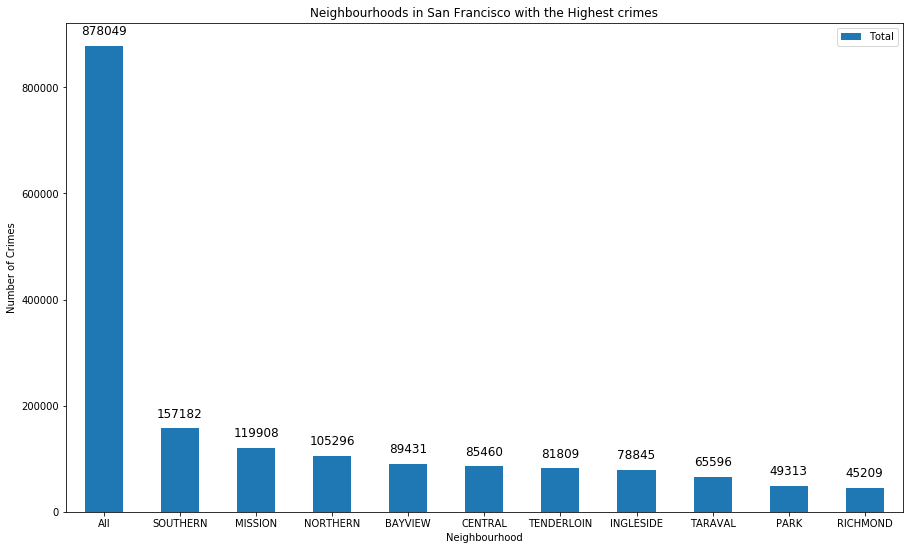

In [59]:
import numpy as np
import matplotlib.pyplot as plt
per_neigh = sfc_crime_cat[['Neighbourhood','Total']]

per_neigh.set_index('Neighbourhood',inplace = True)

ax = per_neigh.plot(kind='bar', figsize=(15, 9), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Neighbourhood')
ax.set_title('Neighbourhoods in San Francisco with the Highest crimes')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 15), 
                textcoords='offset points',
                fontsize = 12,
               )

plt.show()

In [60]:
#####Five Neighborhoods with lowest crime

crime_cat_low = sfc_crime_cat.tail(5)
crime_cat_low

,Neighbourhood,YearARSON,YearASSAULT,YearBAD CHECKS,YearBRIBERY,YearBURGLARY,YearDISORDERLY CONDUCT,YearDRIVING UNDER THE INFLUENCE,YearDRUG/NARCOTIC,YearDRUNKENNESS,...,YearSTOLEN PROPERTY,YearSUICIDE,YearSUSPICIOUS OCC,YearTREA,YearTRESPASS,YearVANDALISM,YearVEHICLE THEFT,YearWARRANTS,YearWEAPON LAWS,Total
9,TENDERLOIN,60,7679,19,15,1488,833,103,17696,439,...,336,27,2513,0,1192,1616,1006,7326,794,81809
2,INGLESIDE,182,8533,32,53,3331,171,206,2373,190,...,347,65,3167,0,416,5374,8960,2528,1130,78845
8,TARAVAL,120,5463,36,17,3463,162,202,1531,259,...,231,59,2996,0,386,4869,6142,1617,567,65596
5,PARK,65,3515,15,7,2888,271,176,2573,374,...,175,20,1656,0,290,2613,3963,2318,357,49313
6,RICHMOND,103,3202,31,8,2696,108,319,999,149,...,206,42,2191,0,245,3180,4117,1010,327,45209


# Results and Discussion 
I set myself the goal of identifying the safest neighborhood in San Francisco where to open a restaurant. To do this, I first collected the data on crime of any kind, large, small, important or not. The goal was to find a safe place so as to make customers and even restaurant managers safe. I achieved this by grouping the neighborhoods in clusters by providing the potential entrepreneur and manager of the restaurant with places and greater protections to be taken.


# Conclusion 

I analyzed the data on the crimes that took place in the city of San Francisco to understand what happened. So I divided them by neighborhood and districts and grouped in such a way as to identify the safest neighborhoods. I focused on districts with fewer crimes to choose where to place the restaurant with greater customer safety.

​